# IMPORTS

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.compose import make_column_transformer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# READING DATA
 reading data and separate it as featuers (X) and Labels(Y)

In [55]:
df = pd.read_csv('C:/Users/hazem/Desktop/Level 7/data/xAPI-Edu-Data.csv')
x = df.drop(['Class'], axis = 'columns')
y = df.Class

In [7]:
df

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


# DATA PRE-PROCESSING

## Data encoding
Since our data is containing a categorical variables, and since we are dealing with a machine, our program can't undersatnd characters, we have to encode our data as (0,1).

we are gonna use OneHotEncoding provided by SKLearn to do that.
OneHotEncoding is going to change the chatogorical data from the features columns. 

OrdinalEncoding is on the other hand is going to change the label data, and since our labeld data has a logical and ordinal values, meaning, (H) is better than (M), and (M) is better than (L).

our ordinal encoder is gonna take that into consideration.
so L = 0, M = 1, H = 2.

In [56]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import OrdinalEncoder

ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder(categories=[['L','M','H']])


ct = make_column_transformer(
    (ohe, ['Topic','Relation','ParentAnsweringSurvey','gender','StudentAbsenceDays','ParentschoolSatisfaction',
           'NationalITy','PlaceofBirth','GradeID','Semester','SectionID',
             'StageID']),
    remainder='passthrough')

x = ct.fit_transform(x)
y = oe.fit_transform(df[['Class']])



## Data distribution
from the plot below we can see that we have a data imbalance in our Class column

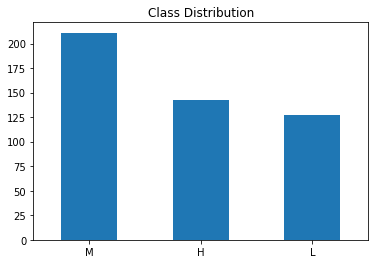

In [22]:
cc = pd.value_counts(df['Class'], sort = True);

cc.plot(kind = 'bar', rot = 0);

plt.title ('Class Distribution');

## Data imbalance
there are a lot of ways to deal with imbalanced data

- UnderSampling : which deletes some samples just to be balanced, but since our dataset is not large, we can use any sample we get

- OverSampling : which adds more samples by guessing the values from our existing dataset  

- Stratify : which split our test data into a balanced split according to our imbalanced data

After some testing OverSampling gave the best results.

In [57]:
from imblearn.combine import SMOTETomek

smk = SMOTETomek(random_state = 0)
x , y = smk.fit_resample(x,y)

## More preprocessing

I've tried a lot of preprocessing methods to get the best score possible.

I tried selceting features using feature importance, but that didn't give good results all the time, and it wasn't consistent.

I tried Standard Scaler, dind't seem to affect the data.

I tried MinMax Scaler, dind't seem to affect the data either.

OverSampling was the most effective preprocess.

Below shown the Class distribution after applying OverSampling

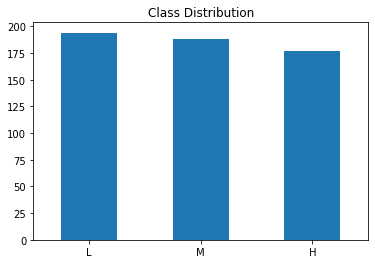

In [54]:
cc = pd.value_counts(y, sort = True);

barchar = cc.plot(kind = 'bar', rot = 0);

plt.title ('Class Distribution');
barchar.set_xticklabels(('L','M','H'));

## Data spliting

now our dataset is ready for training.
below we split the data, 80% for training, and 20% for testing.


In [58]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state=0)

# Testing

## Choosing the model

After testing a lot of algorithms, RandomForset seems the best and most consistent option.

I tested KNN, LogisticRegression , LinearSVC , SVC , DecisionTree , GaussianProcess , AdaBoost , GaussianNB , MLPClassifier.

and since there is not a lot of time i'll be choosing RandomForest to make the model.

## Hyper parameter Tuning

I will be using GridSearchCV to tune my hyper parameter and take the best parameter for my model.
Below is my testing parammeters.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4, 5]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

#create default model
rf_Model = RandomForestClassifier()
rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 5, verbose=2, n_jobs = -1)

#fitting the grid
rf_Grid.fit(x_train, y_train)



Fitting 5 folds for each of 4000 candidates, totalling 20000 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [100, 104, 108, 112, 116, 120, 124,
                                          128, 132, 136, 140, 144, 148, 153,
                                          157, 161, 165, 169, 173, 177, 181,
                                          185, 189, 193, 197, 202, 206, 210,
                                          214, 218, ...]},
             verbose=2)

In [13]:
#download the results into a dataframe
rdf = pd.DataFrame(rf_Grid.cv_results_)

#displaying the highest 10 scores
rdfp = rdf.nlargest(10, 'mean_test_score')
rdfp[['rank_test_score','mean_test_score',]]

,rank_test_score,mean_test_score
3025,1,0.870212
3059,2,0.870187
2096,3,0.868015
2044,4,0.867965
2095,4,0.867965
3087,4,0.867965
2036,7,0.865793
3002,8,0.865768
3005,8,0.865768
2011,10,0.865743


In [14]:
#the best parameter after 4000 test
rf_Grid.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 202}

In [17]:
#testing the grid accuracy
print (f'Train Accuracy - : {rf_Grid.score(x_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Grid.score(x_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 0.884


## Before and after
I will be testing the effect of preprocessing and parameter tuning by testing before and after the change.

### before
testing the algorithm without balancing the data, and without adjusting the parameters.

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier ()

rf.fit(x_train, y_train.ravel())

y_pred = rf.predict(x_test)

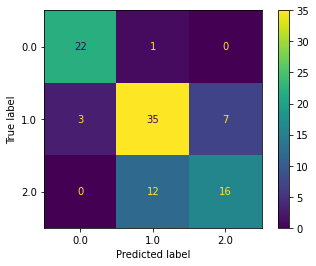

In [49]:
#confusion matrix
plot_confusion_matrix(rf, x_test, y_test)

In [50]:
#score accuracy
accuracy_score(y_test, y_pred)

0.7604166666666666

In [51]:
#f1_score
f1_score(y_test, y_pred, average='weighted')

0.7554471721484294

#### averaging the score
since our dataset is not so large, the model's result isn't even close from one test to another
to get a more acurate result, we will try 100 different models and take the average result. 

In [53]:
iterations = 100
average_accuracy = 0
average_f1_score = 0

for i in range(iterations) : 
    rf = RandomForestClassifier ()
    rf.fit(x_train, y_train.ravel())
    y_pred = rf.predict(x_test)
    average_accuracy = accuracy_score(y_test, y_pred) + average_accuracy
    average_f1_score = f1_score(y_test, y_pred, average='weighted') + average_f1_score
        
        
#print the average results 
average_accuracy = average_accuracy / iterations
average_f1_score = average_f1_score / iterations
print(average_accuracy)
print(average_f1_score)
    

0.7603125000000002
0.7565905532460495


### after
now we test the algorithm after implementing OverSampling and parameter tuning. 

In [59]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier (bootstrap = False,
 max_features = 'sqrt',
 min_samples_leaf = 1,
 min_samples_split= 2,
 n_estimators = 202)

rf.fit(x_train, y_train.ravel())

y_pred = rf.predict(x_test)

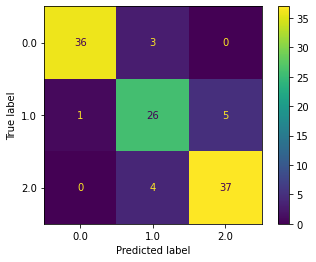

In [60]:
#confusion matrix
plot_confusion_matrix(rf, x_test, y_test)

In [61]:
#score accuracy
accuracy_score(y_test, y_pred)

0.8839285714285714

In [62]:
#f1_score
f1_score(y_test, y_pred, average='weighted')

0.8848355829332367

#### averaging the score
Just like before we have to test the average score to get a more acurate accuracy. 

In [64]:
iterations = 100
average_accuracy = 0
average_f1_score = 0

for i in range(iterations) : 
    rf = RandomForestClassifier (bootstrap = False,
    max_features = 'sqrt',
    min_samples_leaf = 1,
    min_samples_split= 2,
    n_estimators = 202)
    model = rf.fit(x_train, y_train.ravel())
    y_pred = rf.predict(x_test)
    average_accuracy = accuracy_score(y_test, y_pred) + average_accuracy
    average_f1_score = f1_score(y_test, y_pred, average='weighted') + average_f1_score
        
#print the average results 
average_accuracy = average_accuracy / iterations
average_f1_score = average_f1_score / iterations
print(average_accuracy)
print(average_f1_score) 

0.8861607142857139
0.8871427296091329
